<a href="https://colab.research.google.com/github/KGYAMFI22/csv-leaflet-map/blob/main/Generative_AI_Framework_for_Emission_Factor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Generative AI Framework for Emission Factor Recommendation in Carbon Footprint Analysis

   This project demonstrates a carbon footprint calculation tool implemented that uses a zero‑shot classification model to automatically assign an emission factor (EF) based on product descriptions. The tool then combines these EF values with corresponding cost data to compute the total carbon emissions for each product, offering an automated, reproducible, and transparent method for environmental impact assessment.

**Input:**
* Extended sample product data including product names and detailed descriptions.
* Cost data for each product in USD.


**Output:**

* Predicted emission factor (EF) label for each product along with a confidence score.
* Calculated total carbon emissions (in kg CO₂e) for each product.


**Objective:**

* To automate the process of mapping product descriptions to an emission factor using zero-shot classification.
* To calculate the carbon footprint by combining the emission factor with product cost data, thereby aiding in the assessment of environmental impact.


**Limitation:**

* Dependence on the quality and clarity of input product descriptions
* EF mappings are currently based on simulated or limited data and may require validation against authoritative databases

# 1.Installation of Dependencies

In [ ]:
# Cell 1: Install necessary dependencies.
# Run this cell only once to install the Hugging Face Transformers library.
!pip install transformers


import pandas for data manipulation and pipeline from the transformers library to create a zero-shot classification model.

In [ ]:
# Cell 2: Import required libraries.
import pandas as pd
from transformers import pipeline


# 2.Create Extended Sample Input Data

This larger dataset simulates additional input for the emission factor matching process.

In [ ]:
# Cell 3: Create a DataFrame with extended sample product data.
data = {
    "Product": [
        "HDPE Plastic Bag",
        "Aluminum Can",
        "Paper Cup",
        "Glass Bottle",
        "Steel Can",
        "Biodegradable Bag",
        "Plastic Bottle",
        "Cardboard Box"
    ],
    "Description": [
        "A high density polyethylene bag used for packaging food items.",
        "A lightweight aluminum beverage can with a smooth finish.",
        "A disposable paper cup designed for hot beverages.",
        "A glass bottle used for storing beverages and liquids.",
        "A steel can designed for preserving food with high durability.",
        "A bag made from biodegradable material for eco-friendly packaging.",
        "A recyclable plastic bottle used for soft drinks and water.",
        "A cardboard box used for shipping and storage, made from recycled paper."
    ]
}

df_extended = pd.DataFrame(data)
df_extended  # Display the extended DataFrame


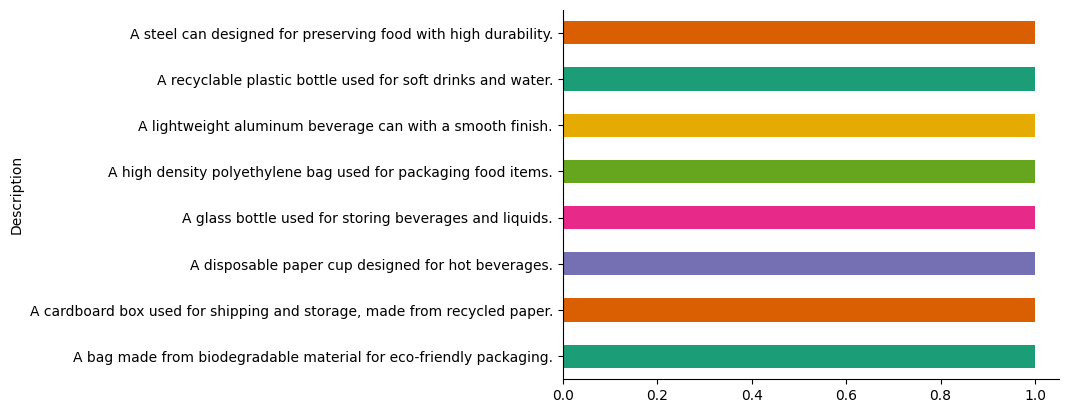

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df_extended.groupby('Description').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# 3.Set Up the Zero-Shot Classification Model and Define Candidate Labels

 create a zero-shot classification pipeline using the "facebook/bart-large-mnli" model. Candidate labels represent sample emission factor values. In a real application, these labels might come from a verified database.

In [ ]:
# Cell 4: Initialize the zero-shot classifier and define candidate EF labels.
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# Define candidate labels for the Emission Factor (EF)
candidate_labels = [
    "Low emission factor: 0.5 kg CO2e per USD (suitable for lightweight, low-energy packaging products)",
    "Moderate emission factor: 1.0 kg CO2e per USD (typical for medium-weight products with average energy consumption)",
    "High emission factor: 1.5 kg CO2e per USD (common for heavy, high-energy consumption industrial products)"
]


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


# 4.Define a Function to Get the Emission Factor

The get_emission_factor function takes a product description as input and uses the classifier to select the best matching emission factor (EF) from the candidate labels. It returns both the predicted label and its confidence score.

In [ ]:
# Cell 5: Define a function to obtain the predicted EF from a product description.
def get_emission_factor(description):
    """
    This function uses the zero-shot classifier to match the product description
    with one of the candidate emission factor labels.
    Returns the predicted label and its associated score.
    """
    result = classifier(description, candidate_labels, multi_label=False)
    predicted_label = result["labels"][0]
    score = result["scores"][0]
    return predicted_label, score


#  5.Apply the Emission Factor Function to the DataFrame

 apply the get_emission_factor function to each description in the extended DataFrame. The predicted emission factor and its score are stored in new columns ("Predicted_EF" and "Score"). The DataFrame is printed to show the matching results.

In [ ]:
# Apply the get_emission_factor function to each product description in the extended DataFrame.
df_extended["Predicted_EF"], df_extended["Score"] = zip(*df_extended["Description"].apply(get_emission_factor))

# Display the DataFrame with the predicted EF and score
print("Emission Factor Matching Results (Extended Input):")
print(df_extended)


Emission Factor Matching Results (Extended Input):
             Product                                        Description  \
0   HDPE Plastic Bag  A high density polyethylene bag used for packa...   
1       Aluminum Can  A lightweight aluminum beverage can with a smo...   
2          Paper Cup  A disposable paper cup designed for hot bevera...   
3       Glass Bottle  A glass bottle used for storing beverages and ...   
4          Steel Can  A steel can designed for preserving food with ...   
5  Biodegradable Bag  A bag made from biodegradable material for eco...   
6     Plastic Bottle  A recyclable plastic bottle used for soft drin...   
7      Cardboard Box  A cardboard box used for shipping and storage,...   

                                        Predicted_EF     Score  
0  Low emission factor: 0.5 kg CO2e per USD (suit...  0.523408  
1  Low emission factor: 0.5 kg CO2e per USD (suit...  0.599105  
2  Low emission factor: 0.5 kg CO2e per USD (suit...  0.590566  
3  Moderate e

# 7.Add Cost Data and Map EF Labels to Numeric Values

adds a new column "Cost_USD" with example cost values for each product. A dictionary ef_mapping is defined to convert each candidate EF label into its corresponding numeric value, which will be used for calculating the carbon footprint

In [ ]:
# Cell 7: Add a cost column (in USD) for each product and define a mapping for EF labels to numeric values.
df_extended["Cost_USD"] = [100, 50, 30, 80, 60, 90, 40, 70]  # Example cost values for each product

# Mapping dictionary to convert EF labels to numeric values (kg CO2e per USD)
ef_mapping = {
    "0.5 kg CO2e per USD": 0.5,
    "1.0 kg CO2e per USD": 1.0,
    "1.5 kg CO2e per USD": 1.5
}


 calculate each product's carbon footprint by multiplying its cost (in USD) by the corresponding emission factor value (retrieved from ef_mapping). The result is stored in the new column "Total_Emission_kgCO2e", and the key columns are printed to show the final calculated emissions.

In [ ]:
# Cell 8: Calculate the total carbon emissions (in kg CO2e) for each product.
df_extended["Total_Emission_kgCO2e"] = df_extended.apply(
    lambda row: row["Cost_USD"] * ef_mapping.get(row["Predicted_EF"], 1.0), axis=1
)

# Display the results with key columns
print("\nCarbon Footprint Calculation for Each Product (Extended Input):")
print(df_extended[["Product", "Cost_USD", "Predicted_EF", "Total_Emission_kgCO2e"]])



Carbon Footprint Calculation for Each Product (Extended Input):
             Product  Cost_USD  \
0   HDPE Plastic Bag       100   
1       Aluminum Can        50   
2          Paper Cup        30   
3       Glass Bottle        80   
4          Steel Can        60   
5  Biodegradable Bag        90   
6     Plastic Bottle        40   
7      Cardboard Box        70   

                                        Predicted_EF  Total_Emission_kgCO2e  
0  Low emission factor: 0.5 kg CO2e per USD (suit...                  100.0  
1  Low emission factor: 0.5 kg CO2e per USD (suit...                   50.0  
2  Low emission factor: 0.5 kg CO2e per USD (suit...                   30.0  
3  Moderate emission factor: 1.0 kg CO2e per USD ...                   80.0  
4  Low emission factor: 0.5 kg CO2e per USD (suit...                   60.0  
5  Low emission factor: 0.5 kg CO2e per USD (suit...                   90.0  
6  Low emission factor: 0.5 kg CO2e per USD (suit...                   40.0  
7  L

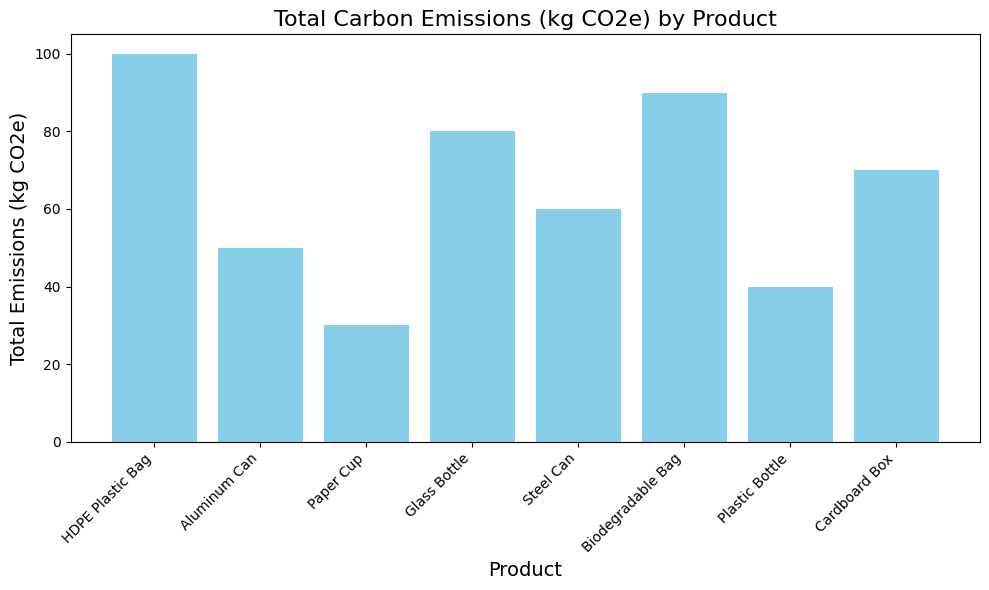

In [ ]:
# Section 9: Visualize the results using matplotlib

import matplotlib.pyplot as plt

# Set the figure size for clarity
plt.figure(figsize=(10, 6))

# Create a bar chart: x-axis for products, y-axis for total emissions (kg CO2e)
plt.bar(df_extended["Product"], df_extended["Total_Emission_kgCO2eq"], color="skyblue")

# Add titles and axis labels
plt.title("Total Carbon Emissions (kg CO2e) by Product", fontsize=16)
plt.xlabel("Product", fontsize=14)
plt.ylabel("Total Emissions (kg CO2e)", fontsize=14)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha="right")

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the plot
plt.show()


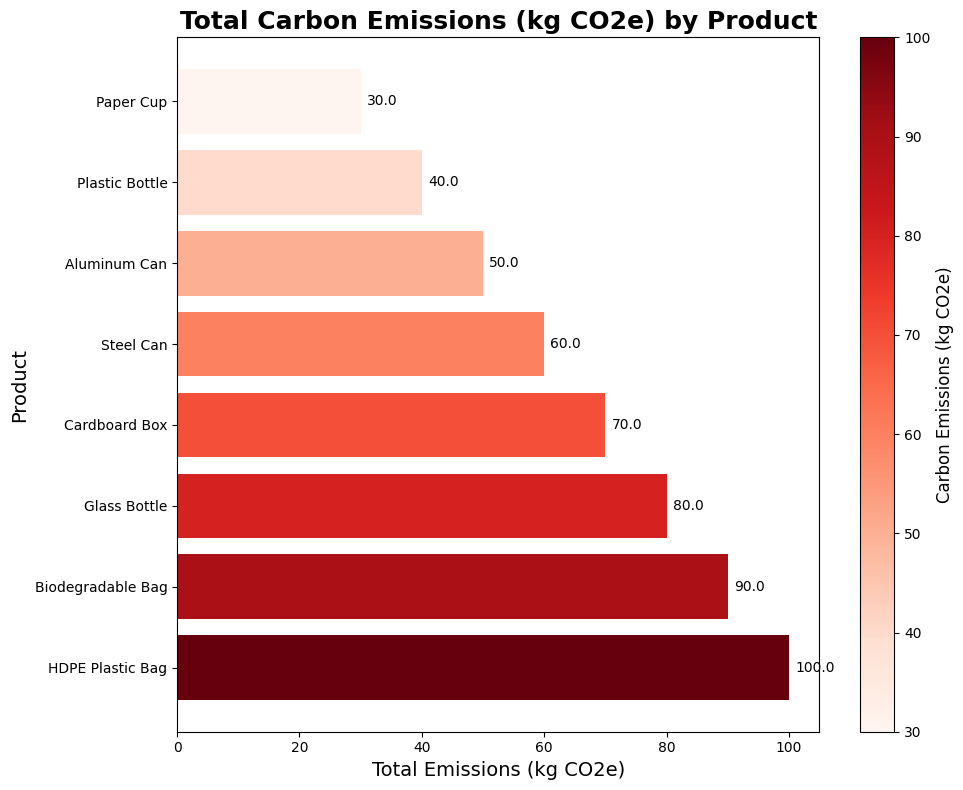

In [ ]:
# Improved Plot

# Sorting products by total emissions
df_sorted = df_extended.sort_values(by="Total_Emission_kgCO2eq", ascending=False)

# Normalize data for color mapping
norm = plt.Normalize(df_sorted["Total_Emission_kgCO2eq"].min(), df_sorted["Total_Emission_kgCO2eq"].max())
colors = plt.cm.Reds(norm(df_sorted["Total_Emission_kgCO2eq"]))

# Create figure and axes objects
fig, ax = plt.subplots(figsize=(10, 8))

# Create a horizontal bar chart
bars = ax.barh(df_sorted["Product"], df_sorted["Total_Emission_kgCO2eq"], color=colors)

# Create the colorbar
sm = ScalarMappable(cmap="Reds", norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("Carbon Emissions (kg CO2eq)", fontsize=12)

# Add title and axis labels
ax.set_title("Total Carbon Emissions (kg CO2eq) by Product", fontsize=18, fontweight="bold")
ax.set_xlabel("Total Emissions (kg CO2eq)", fontsize=14)
ax.set_ylabel("Product", fontsize=14)

# Add data labels to the bars
for index, value in enumerate(df_sorted["Total_Emission_kgCO2e"]):
    ax.text(value + 1, index, f"{value:.1f}", va="center", fontsize=10)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()
